# Stochastic gradient algorithms

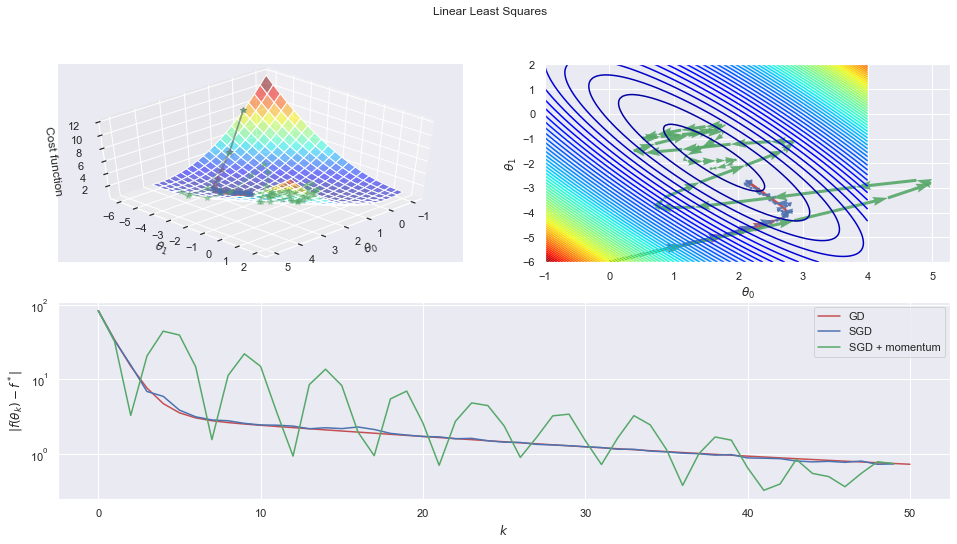

In [98]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()

N_ITERS = 50
N_POINTS = 100
BATCH_SIZE = 10
MOMENTUM = 0.9
THETA_0 = np.array([0,-6]).reshape(-1,1)

def costfunction(X,y,theta):
    m = np.size(y)

    #Cost function in vectorized form
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;


def gradient_descent(X,y,theta,alpha = 0.0005,num_iters=1000):
    #Initialisation of useful values 
    m = np.size(y)
    J_history = []
    theta_0_hist, theta_1_hist = [], [] #For plotting afterwards
    theta_0_hist.append(theta[0,0])
    theta_1_hist.append(theta[1,0])
    J_history.append(costfunction(X,y,theta))

    for i in range(num_iters):
        #Grad function in vectorized form
        h = X @ theta
        theta = theta - alpha * (1/m)* (X.T @ (h-y))

        #Cost and intermediate values for each iteration
        J_history.append(costfunction(X,y,theta))
        theta_0_hist.append(theta[0,0])
        theta_1_hist.append(theta[1,0])

    return theta,J_history, theta_0_hist, theta_1_hist

def stochastic_gradient_descent(X,y,theta,alpha = 0.0005,num_iters=1000, batch = 10):
    #Initialisation of useful values 
    m = np.size(y)
    J_history = []
    theta_0_hist, theta_1_hist = [], [] #For plotting afterwards
    theta_0_hist.append(theta[0,0])
    theta_1_hist.append(theta[1,0])
    J_history.append(costfunction(X,y,theta))

    for i in range(1, num_iters):
        choice = np.random.randint(0,m,batch)
        X_b, y_b = X[choice, :], y[choice]
        #Grad function in vectorized form
        h = X_b @ theta
        theta = theta - alpha * (1/batch)* (X_b.T @ (h-y_b))

        #Cost and intermediate values for each iteration
        J_history.append(costfunction(X,y,theta))
        theta_0_hist.append(theta[0,0])
        theta_1_hist.append(theta[1,0])

    return theta,J_history, theta_0_hist, theta_1_hist

def stochastic_gradient_descent_momentum(X,y,theta,alpha = 0.0005,num_iters=1000, batch = 10, momentum = 0.1):
    #Initialisation of useful values 
    m = np.size(y)
    J_history = []
    theta_0_hist, theta_1_hist = [], [] #For plotting afterwards
    theta_0_hist.append(theta[0,0])
    theta_1_hist.append(theta[1,0])
    J_history.append(costfunction(X,y,theta))
    d = np.zeros_like(theta)

    for i in range(1, num_iters):
        choice = np.random.randint(0,m,batch)
        X_b, y_b = X[choice, :], y[choice]
        #Grad function in vectorized form
        h = X_b @ theta
        d = (- alpha * (1/batch)* (X_b.T @ (h-y_b))) + momentum*d
        theta = theta + d

        #Cost and intermediate values for each iteration
        J_history.append(costfunction(X,y,theta))
        theta_0_hist.append(theta[0,0])
        theta_1_hist.append(theta[1,0])

    return theta,J_history, theta_0_hist, theta_1_hist



#Creating the dataset (as previously)
x          = np.linspace(0,1,N_POINTS)
noise      = 1*np.random.uniform(size = N_POINTS)
y          = np.sin(x * 1.5 * np.pi ) 
y_noise    = (y + noise).reshape(-1,1)
X          = np.vstack((np.ones(len(x)),x)).T

THETA_STAR = np.linalg.lstsq(X,y, rcond=-1)[0]
F_STAR     = costfunction(X, y, THETA_STAR)


#Setup of meshgrid of theta values
T0, T1 = np.meshgrid(np.linspace(-1,4,100),np.linspace(-6,2,100))

#Computing the cost function for each theta combination
zs = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(T0), np.ravel(T1)) ] )
#Reshaping the cost values    
Z = zs.reshape(T0.shape)


#Computing the gradient descent
theta_result,      J_history,      theta_0,      theta_1      = gradient_descent(X,y_noise,THETA_0,alpha = 0.3,num_iters=N_ITERS)
theta_result_sgd,  J_history_sgd,  theta_0_sgd,  theta_1_sgd  = stochastic_gradient_descent(X,y_noise,THETA_0,alpha = 0.3,num_iters=N_ITERS, batch = BATCH_SIZE)
theta_result_sgdm, J_history_sgdm, theta_0_sgdm, theta_1_sgdm = stochastic_gradient_descent_momentum(X,y_noise,THETA_0,alpha = 0.3,num_iters=N_ITERS, batch = BATCH_SIZE, momentum = MOMENTUM)

#Angles needed for quiver plot
anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

anglesx_sgd = np.array(theta_0_sgd)[1:] - np.array(theta_0_sgd)[:-1]
anglesy_sgd = np.array(theta_1_sgd)[1:] - np.array(theta_1_sgd)[:-1]

anglesx_sgdm = np.array(theta_0_sgdm)[1:] - np.array(theta_0_sgdm)[:-1]
anglesy_sgdm = np.array(theta_1_sgdm)[1:] - np.array(theta_1_sgdm)[:-1]


%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0,theta_1,J_history, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')
ax.plot(theta_0_sgd,theta_1_sgd,J_history_sgd, marker = '*', color = 'b', alpha = .4, label = 'Stochastic Gradient descent')
ax.plot(theta_0_sgdm,theta_1_sgdm,J_history_sgdm, marker = '*', color = 'g', alpha = .4, label = 'Stochastic Gradient descent + momentum')

ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('Cost function')
ax.view_init(45, 45)


#Contour plot
ax = fig.add_subplot(2, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9, label='GD')
ax.quiver(theta_0_sgd[:-1], theta_1_sgd[:-1], anglesx_sgd, anglesy_sgd, scale_units = 'xy', angles = 'xy', scale = 1, color = 'b', alpha = .9, label='SGD')
ax.quiver(theta_0_sgdm[:-1], theta_1_sgdm[:-1], anglesx_sgdm, anglesy_sgdm, scale_units = 'xy', angles = 'xy', scale = 1, color = 'g', alpha = .9, label='SGD + momentum')


ax = fig.add_subplot(2, 1, 2)
ax.semilogy([np.abs(f - F_STAR)/F_STAR for f in J_history], label = 'GD', color = 'r')
ax.semilogy([np.abs(f - F_STAR)/F_STAR for f in J_history_sgd], label = 'SGD', color = 'b')
ax.semilogy([np.abs(f - F_STAR)/F_STAR for f in J_history_sgdm], label = 'SGD + momentum', color = 'g')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$\|f(\theta_k) - f^*\|$')
plt.legend()

plt.suptitle('Linear Least Squares')
# plt.tight_layout()

plt.show()